In [205]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


$ F_X(0) = 0.5 $ \
\
where $X$ is a standard normal random variable. $X$~$N(0, 1)$

In [206]:
# Standard normal CDF
norm.cdf(0)  #

0.5

_norm.cdf_ also takes optional parameters:\
\
_loc_: mean of $X$ = $\mu$ \
_scale_: standard deviation of $X$ = $\sigma$ \
\
where $X$ is a normal random variable with mean $\mu$ and variance $\sigma^2$\
\
$X$~$N(\mu, \sigma^2)$

In [207]:
# Example with mu=4, sigma=2. We expect FX(2) = 0.16 because: 0.5 - (0.68/2) = 0.16
norm.cdf(2, loc = 4, scale = 2)

0.15865525393145707

In [208]:
# Custom function that takes the values x, mean and variance to give the value of CDF at x.
def evalNormalCDF(x, mean=0, var=1):
    """ Evaluates cumulative distribution function of a normal random variable.

    Args:
        x (float): Input to the CDF where we are interested in the probability that the random variable is less than x. P(X <= x).
        mean (float): Expected value of the random variable. E[X] = mean
        var (float): Variance of the random variable. Var(X) = var

    Returns:
        Probability that the random variable is less than x. P(X <= x)
    """
    return norm.cdf(x, mean, var**0.5)

In [209]:
evalNormalCDF(2, 4, 4)  # Same as above.

0.15865525393145707

In [210]:
# Using statistical distributions to model stock returns
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
from matplotlib import pyplot as plt
from scipy import stats

yfin.pdr_override()

In [211]:
start = datetime.date.today() - datetime.timedelta(365 * 20)
end = datetime.date.today()

prices = pd.DataFrame(web.DataReader("^GSPC", start = start, end = end)["Adj Close"])
prices = prices.rename(columns={"Adj Close":"SP500"})
prices.tail()

[*********************100%%**********************]  1 of 1 completed


,SP500
Date,
2023-09-01,4515.770020
2023-09-05,4496.830078
2023-09-06,4465.479980
2023-09-07,4451.140137
2023-09-08,4457.490234


In [212]:
df = pd.DataFrame(np.log(prices["SP500"]) - np.log(prices["SP500"].shift(1)))
df = df.iloc[1:, :]
df.head()

,SP500
Date,
2003-09-16,0.014197
2003-09-17,-0.003260
2003-09-18,0.013178
2003-09-19,-0.003160
2003-09-22,-0.013093


In [213]:
# Are the returns symmetric?
len(df[df["SP500"] < df["SP500"].mean()]["SP500"]) / len(df["SP500"])

# This means ~%53.6 of the returns are below the mean, roughly symmetric.
# There is a slight skew to the negative.

0.4761431411530815

In [214]:
# Is volatility constant?
df["Vol stdev"] = df["SP500"].rolling(50).std()
df.tail()

,SP500,Vol stdev
Date,,
2023-09-01,0.001798,0.006757
2023-09-05,-0.004203,0.006687
2023-09-06,-0.006996,0.006736
2023-09-07,-0.003216,0.006574
2023-09-08,0.001426,0.006575


<AxesSubplot:xlabel='Date'>

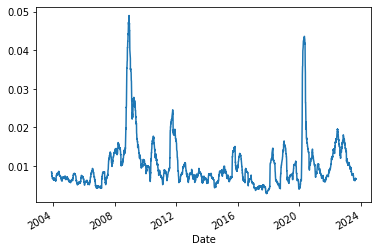

In [215]:
df["Vol stdev"].plot()
# Volatility is NOT constant.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   2.,   2.,   0.,   2.,   2.,   3.,
          4.,   5.,   5.,   4.,   5.,   9.,  13.,  14.,  26.,  14.,  36.,
         35.,  46.,  66.,  97., 120., 164., 253., 306., 475., 725., 716.,
        531., 393., 270., 204., 146., 109.,  54.,  33.,  33.,  25.,  11.,
         13.,   7.,   6.,   4.,   5.,   7.,   2.,   2.,   3.,   0.,   2.,
          0.,   1.,   3.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.1276522 , -0.12527996, -0.12290771, -0.12053547, -0.11816323,
        -0.11579099, -0.11341875, -0.11104651, -0.10867426, -0.10630202,
        -0.10392978, -0.10155754, -0.0991853 , -0.09681306, -0.09444081,
        -0.09206857, -0.08969633, -0.08732409, -0.08495185, -0.08257961,
        -0.08020736, -0.07

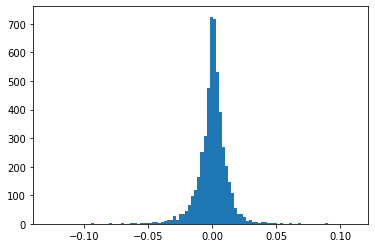

In [216]:
# Are the returns normally distributed? Histogram method
fig, ax = plt.subplots()
ax.hist(df["SP500"], bins = 100)

# Looks normal.

In [217]:
# Are the returns normally distributed? Let's check it out with a normal plot.
sample = np.array(df["SP500"])
sample.sort()  # sort our sample of returns
standard_normal_draw = np.random.normal(size=len(sample))
standard_normal_draw.sort()  # sort our draw
print(standard_normal_draw)

[-3.50424185 -3.10572254 -3.07264487 ...  3.24131093  3.42533909
  3.42877694]


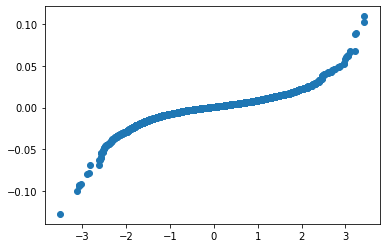

In [218]:
# Plot the normal plot
fig, ax = plt.subplots()
ax.scatter(standard_normal_draw, sample)
# Does not look normal. (We expect a line in normal distributions.)

In [221]:
# Student's t distribution:
np.random.seed(555)
stats.t.rvs(df=5030, size=5000)

array([ 0.14771609,  1.16828697,  0.33556735, ...,  0.67286373,
        0.70084191, -0.31366766])

(array([0.00410787, 0.00273858, 0.00410787, 0.0075311 , 0.00890039,
        0.01437756, 0.01848543, 0.02670118, 0.03217835, 0.04381733,
        0.06641064, 0.08626536, 0.1033815 , 0.13008269, 0.1677382 ,
        0.19923191, 0.2245638 , 0.25194963, 0.29713625, 0.32452207,
        0.35601578, 0.39161736, 0.41557996, 0.38066302, 0.36491617,
        0.39777917, 0.38203232, 0.33205318, 0.32109885, 0.25948073,
        0.25263427, 0.22524844, 0.18348505, 0.13145198, 0.12186694,
        0.09174253, 0.06777993, 0.0403941 , 0.04244804, 0.0239626 ,
        0.01506221, 0.01369291, 0.00890039, 0.00273858, 0.00479252,
        0.00342323, 0.        , 0.        , 0.00068465, 0.00068465]),
 array([-3.45444853, -3.30838759, -3.16232665, -3.01626571, -2.87020476,
        -2.72414382, -2.57808288, -2.43202194, -2.28596099, -2.13990005,
        -1.99383911, -1.84777817, -1.70171722, -1.55565628, -1.40959534,
        -1.2635344 , -1.11747345, -0.97141251, -0.82535157, -0.67929063,
        -0.53322968, -0.38

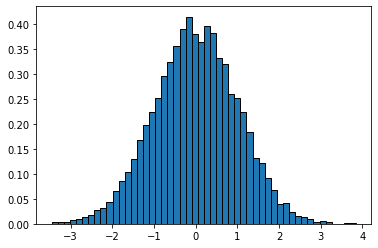

In [222]:
# generate t distribution with sample size 10000
x = stats.t.rvs(df=5030, size=10000)

# create plot of t distribution
plt.hist(x, density=True, edgecolor="black", bins=50)